**Name: XXXXXX**
**Student ID: pxxxxxx**

###**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.frequent_patterns import association_rules, apriori
warnings.filterwarnings('ignore')

## **Data Consolidation**

**Import raw dataset from a CSV file into a dataframe**

In [2]:
df = pd.read_csv('bread basket.csv')
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


**Show the number of records and columns as well as features** 

In [3]:
print("Number of records:", df.shape[0])
print("Number of columns:", df.shape[1])
print('-'*100)
print("The attributes of data :", df.columns.values)

Number of records: 20507
Number of columns: 5
----------------------------------------------------------------------------------------------------
The attributes of data : ['Transaction' 'Item' 'date_time' 'period_day' 'weekday_weekend']


**Show the details of the dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


## **Data Cleaning**

**Check duplicates**

In [5]:
df.duplicated().sum()

1620

**Drop duplicates**



In [6]:
df.drop_duplicates(inplace=True, ignore_index=True)
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,3,Hot chocolate,30-10-2016 10:07,morning,weekend
3,3,Jam,30-10-2016 10:07,morning,weekend
4,3,Cookies,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
18882,9682,Coffee,09-04-2017 14:32,afternoon,weekend
18883,9682,Tea,09-04-2017 14:32,afternoon,weekend
18884,9683,Coffee,09-04-2017 14:57,afternoon,weekend
18885,9683,Pastry,09-04-2017 14:57,afternoon,weekend


**Check missing values**

In [7]:
print('Is there any missing value?',df.isnull().values.any())
missing_percentage = (df.isnull().sum() / (df.shape[0])) * 100
missing_value_df = pd.DataFrame({'Count': df.isnull().sum(),'Percentage': missing_percentage})
missing_value_df[missing_value_df.Count != 0]

Is there any missing value? False


,Count,Percentage


## **Data Transformation**

In [8]:
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
3,3,Jam,2016-10-30 10:07:00,morning,weekend
4,3,Cookies,2016-10-30 10:07:00,morning,weekend
...,...,...,...,...,...
18882,9682,Coffee,2017-09-04 14:32:00,afternoon,weekend
18883,9682,Tea,2017-09-04 14:32:00,afternoon,weekend
18884,9683,Coffee,2017-09-04 14:57:00,afternoon,weekend
18885,9683,Pastry,2017-09-04 14:57:00,afternoon,weekend


**Split date & time**

In [9]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('date_time',axis=1,inplace=True)
df

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
3,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Cookies,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
...,...,...,...,...,...,...,...,...,...
18882,9682,Coffee,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
18883,9682,Tea,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
18884,9683,Coffee,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday
18885,9683,Pastry,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday


In [10]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()
df

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
3,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,cookies,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
...,...,...,...,...,...,...,...,...,...
18882,9682,coffee,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
18883,9682,tea,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
18884,9683,coffee,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday
18885,9683,pastry,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday


## **Data Exploration**

In [11]:
# Count of unique transactions
df['Transaction'].nunique()

9465

In [12]:
df.Item.value_counts()

coffee            4528
bread             3097
tea               1350
cake               983
pastry             815
                  ... 
bacon                1
gift voucher         1
olum & polenta       1
raw bars             1
polenta              1
Name: Item, Length: 94, dtype: int64

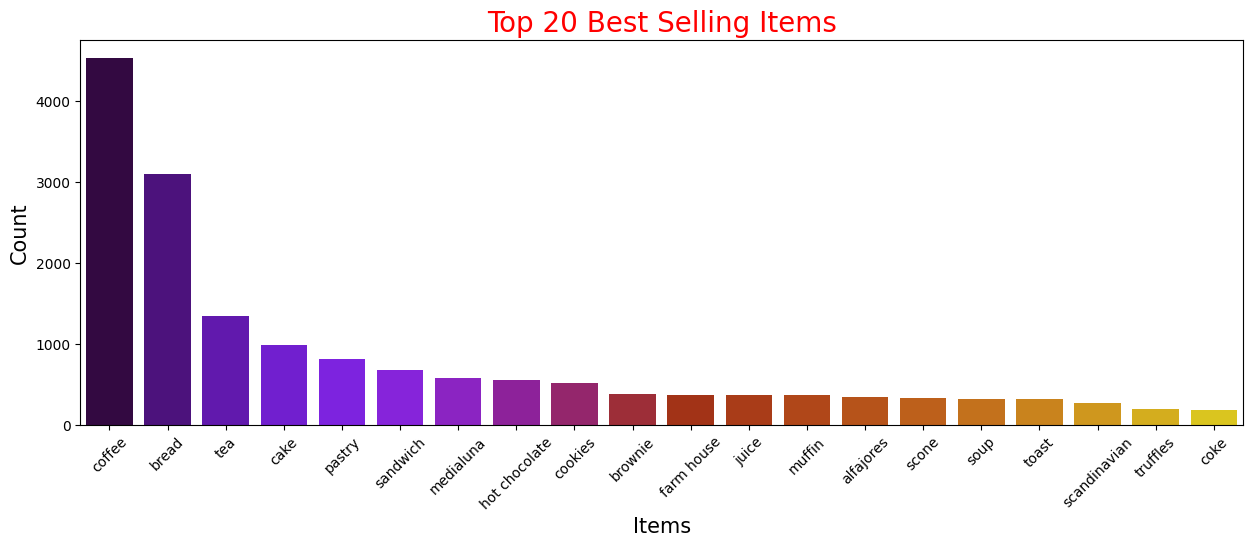

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count', size = 15)
plt.title('Top 20 Best Selling Items', color = 'Red', size = 20)
plt.show()

In [14]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran

,month,Transaction
0,April,953
1,August,649
2,December,2419
3,February,2415
4,January,2833
5,July,685
6,June,690
7,March,2996
8,May,840
9,November,2875


In [15]:
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran

,month,Transaction,monthorder
0,April,953,4
1,August,649,8
2,December,2419,12
3,February,2415,2
4,January,2833,1
5,July,685,7
6,June,690,6
7,March,2996,3
8,May,840,5
9,November,2875,11


In [16]:
monthTran.sort_values("monthorder",inplace=True)
monthTran

,month,Transaction,monthorder
4,January,2833,1
3,February,2415,2
7,March,2996,3
0,April,953,4
8,May,840,5
6,June,690,6
5,July,685,7
1,August,649,8
11,September,553,9
10,October,979,10


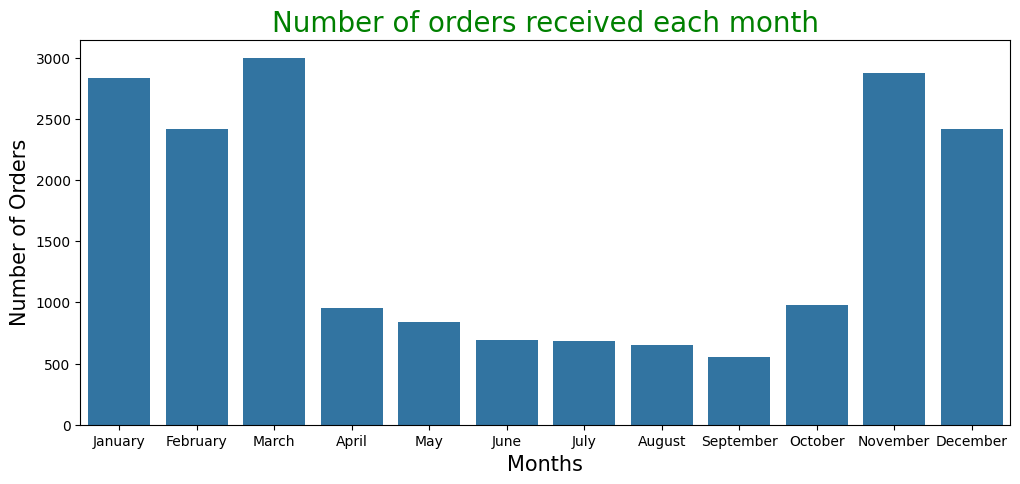

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Number of Orders', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()

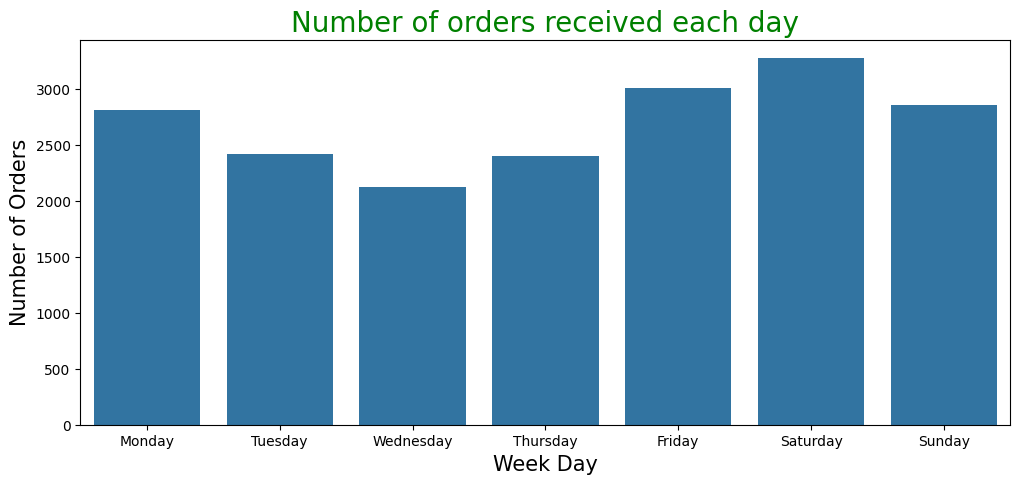

In [18]:
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Number of Orders', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()


plt.show()

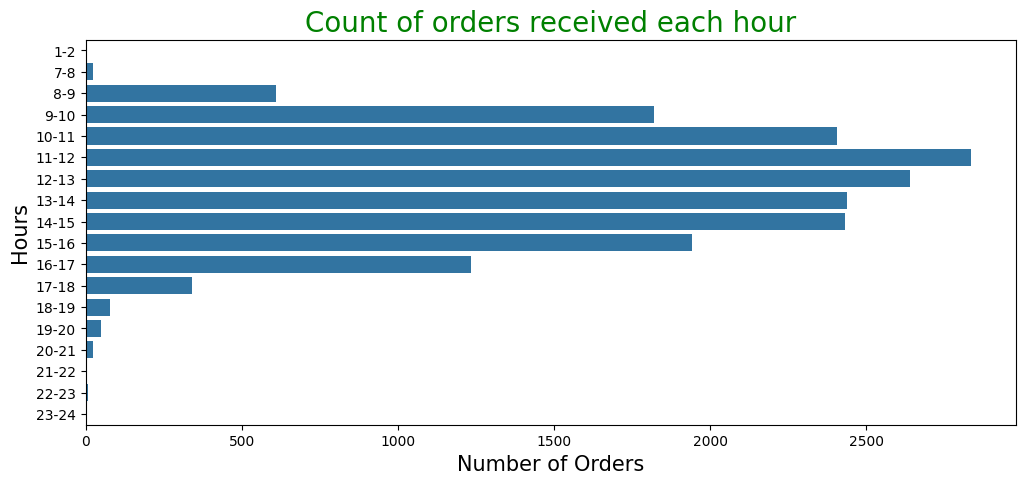

In [19]:
hourTran = df.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Number of Orders', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

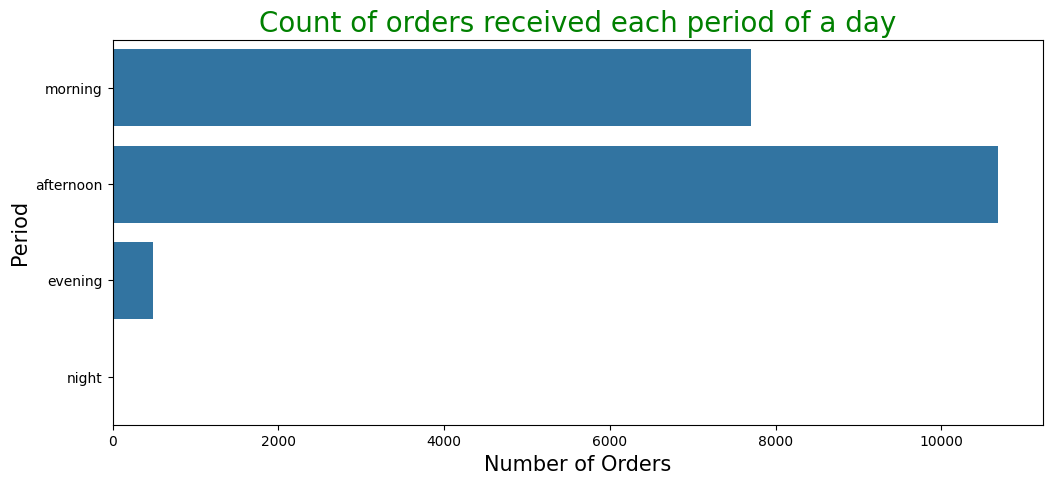

In [20]:
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()
dayTran.loc[:,"dayorder"] = [1,2,0,4]
dayTran.sort_values("dayorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Number of Orders', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

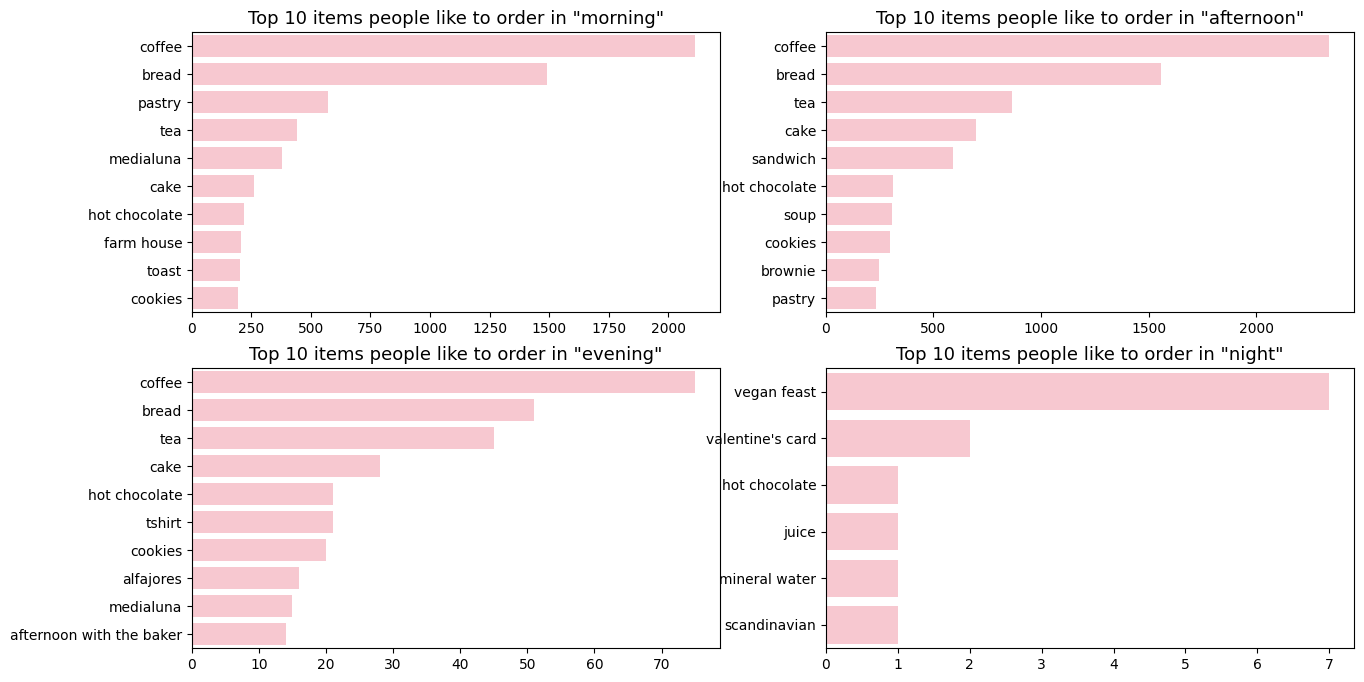

In [21]:
data = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

## **Association Rules Mining**

In [22]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Quantity')
transactions_str

,Transaction,Item,Quantity
0,1,bread,1
1,2,scandinavian,1
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [23]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not (0 or 1 only)
df_matrix = transactions_str.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)
df_matrix

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# using the 'apriori algorithm' with min_support=0.01 (e.g., 1% of 9465)
# It means the item should be present in at least 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(df_matrix, min_support = 0.02,use_colnames = True)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.327205,(bread)
2,0.040042,(brownie)
3,0.103856,(cake)
4,0.478394,(coffee)
5,0.054411,(cookies)
6,0.039197,(farm house)
7,0.058320,(hot chocolate)
8,0.038563,(juice)
9,0.061807,(medialuna)


In [28]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('lift', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
4,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
19,(coffee),(toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
18,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
13,(coffee),(medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
12,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
15,(coffee),(pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
14,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
11,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
10,(coffee),(juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428


In [29]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
12,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
14,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
11,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
16,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
2,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
6,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
9,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
1,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538


**Question 1: What can you observe from the rules in above? Please briefly discuss THREE observations you find the most interesting (using point form).**

Answer 1:

**Question 2: If you were the bakery manager, what would be your sales / marketing strategies? Please discuss TWO strategies that you find the most useful (using point form).**

Answer 2:

**Question 3: Given the minimum support of 2%, which rule should be the worst to the bakery while the items would not be bought together? Why?**

Answer 3: 